In [16]:
# Import needed libraries
import librosa
import librosa.display
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [ ]:
# Set the path to AudioSubSet folder
audio_folder = 'AudioSubSet'

# Define a function to extract emotion labels from file names
def get_emotion_from_filename(filename):
    parts = filename.split('_')
    if len(parts) > 2:
        return parts[2]  
    return 'Unknown'

# List all .wav files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Plot waveform and spectrogram for each file
for file_name in audio_files:
    file_path = os.path.join(audio_folder, file_name)
    emotion = get_emotion_from_filename(file_name)  # Extract the emotion label
    
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Plot waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.title(f"{emotion} - Waveform")
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    # Plot spectrogram
    plt.subplot(2, 1, 2)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"{emotion} - Spectrogram")
    
    plt.tight_layout()
    plt.show()


NameError: name 'os' is not defined

In [25]:
# Set the path to AudioSubset folder
audio_folder = 'AudioSubset'

# List all .wav files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Loop through each file and create an audio playback button
for file_name in audio_files:
    file_path = os.path.join(audio_folder, file_name)
    emotion = file_name.split('_')[2]  # Extract emotion from filename
    
    # Display emotion label and audio playback button
    print(f"Emotion: {emotion}")
    display(Audio(filename=file_path))

Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


Emotion: ANG


Emotion: DIS


Emotion: FEA


Emotion: HAP


Emotion: NEU


Emotion: SAD


In [26]:
# List all .wav files in the folder
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

# Filter and display only "Sad" audio files
print("Sad Emotion Samples:")
for file_name in audio_files:
    if "SAD" in file_name.split('_'):  # Check if the third part is 'SAD' for Anger
        file_path = os.path.join(audio_folder, file_name)
        display(Audio(filename=file_path))

Sad Emotion Samples:


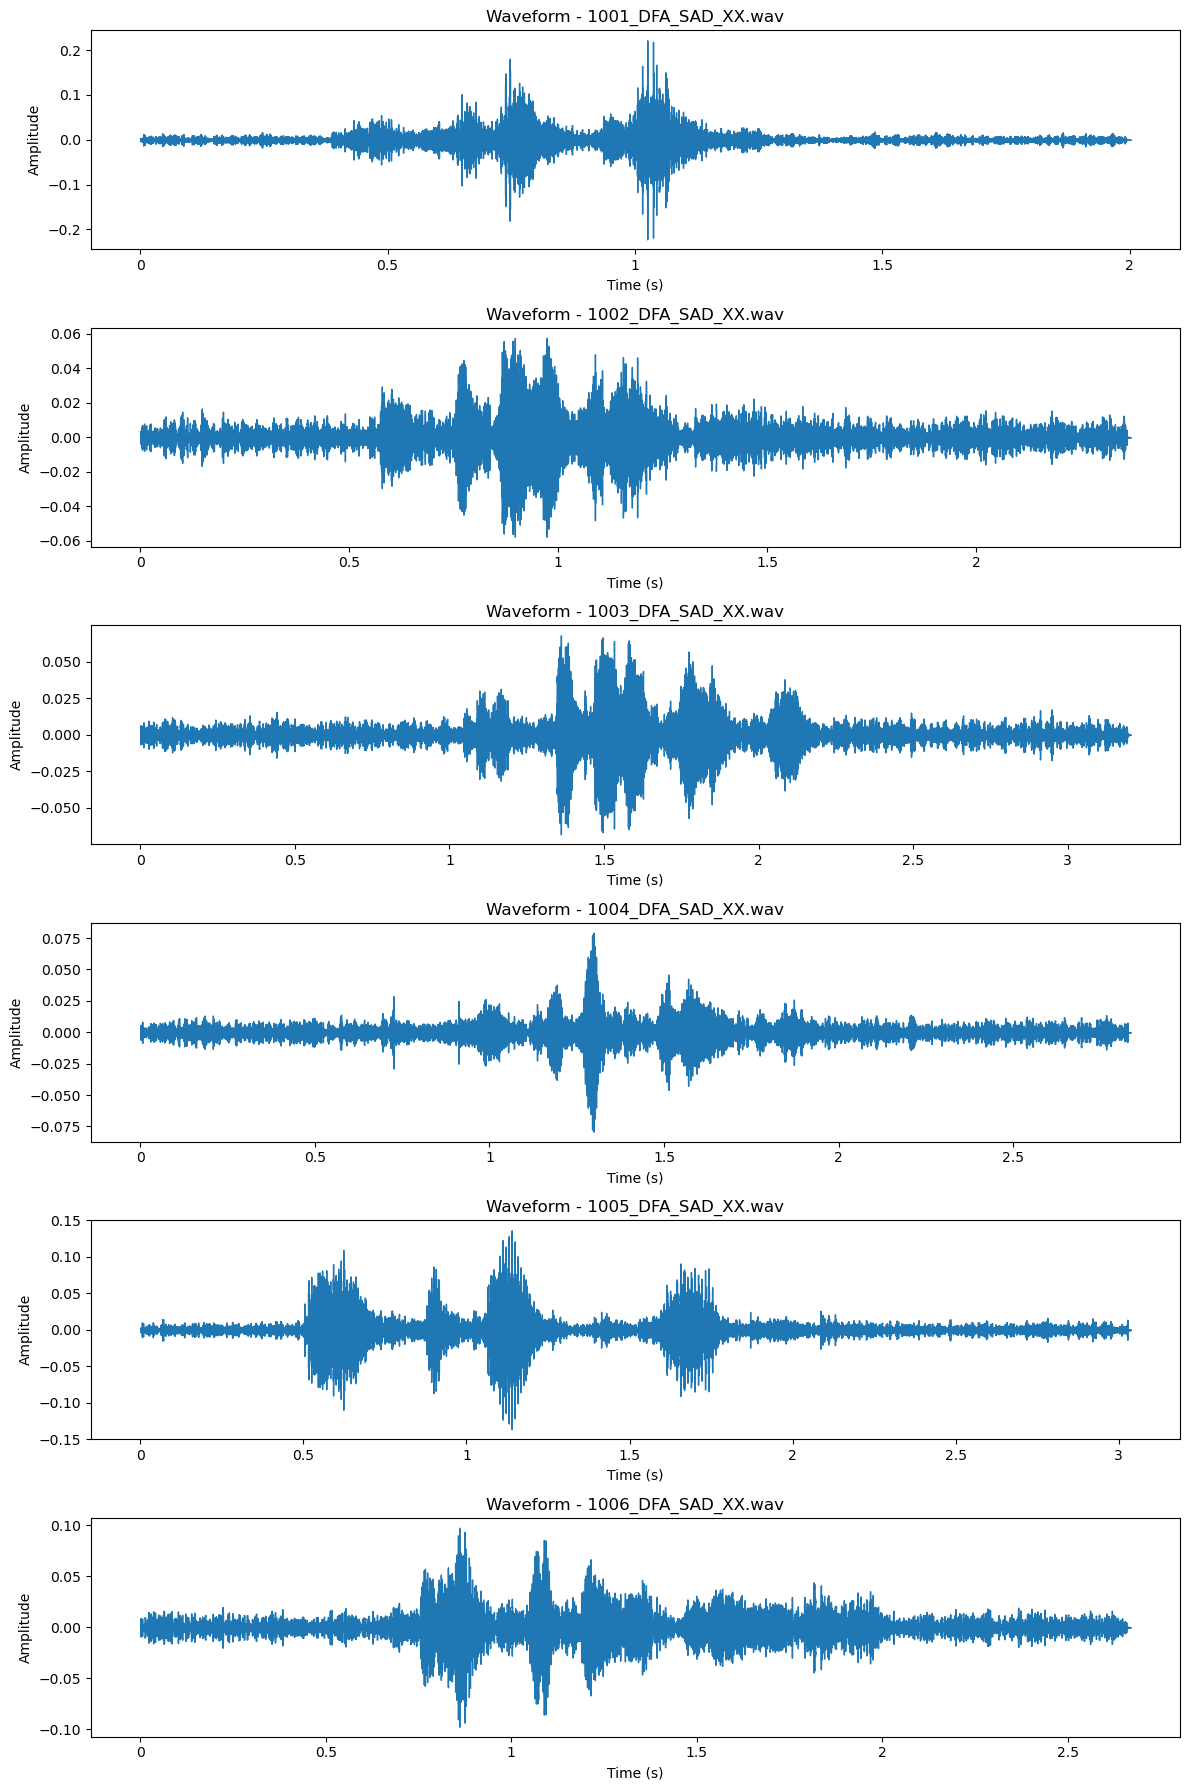

In [27]:
# List all .wav files in the folder and filter for "Sad" files
sad_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav') and 'SAD' in f.split('_')]

# Initialize the plot with the exact number of rows needed
plt.figure(figsize=(12, len(sad_files) * 3))

# Plot each "Sad" file waveform
for idx, file_name in enumerate(sad_files):
    file_path = os.path.join(audio_folder, file_name)
    
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Plot waveform
    plt.subplot(len(sad_files), 1, idx + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {file_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [28]:
# Set the path to AudioSadTone folder
audio_sadtone = 'AudioSadTone'

# Filter and group "Sad" files by pitch label, then select the first 9 files
sad_tone_files = []
for file_name in os.listdir(audio_sadtone):
    if file_name.endswith('.wav') and 'SAD' in file_name.split('_'):  # Filter for "Sad" emotion
        sad_tone_files.append(file_name)

# Limit to the first 9 files, for quick review
sad_tone_files = sad_tone_files[:9]

# Display audio controls for each of the first 9 "Sad" files
for file_name in sad_tone_files:
    file_path = os.path.join(audio_sadtone, file_name)
    tone = file_name.split('_')[3].replace('.wav', '')  # Get tone label from the third part
    print(f"File: {file_name}, Tone: {tone}")
    display(Audio(filename=file_path))


File: 1001_IEO_SAD_HI.wav, Tone: HI


File: 1001_IEO_SAD_LO.wav, Tone: LO


File: 1001_IEO_SAD_MD.wav, Tone: MD


File: 1002_IEO_SAD_HI.wav, Tone: HI


File: 1002_IEO_SAD_LO.wav, Tone: LO


File: 1002_IEO_SAD_MD.wav, Tone: MD


File: 1003_IEO_SAD_HI.wav, Tone: HI


File: 1003_IEO_SAD_LO.wav, Tone: LO


File: 1003_IEO_SAD_MD.wav, Tone: MD


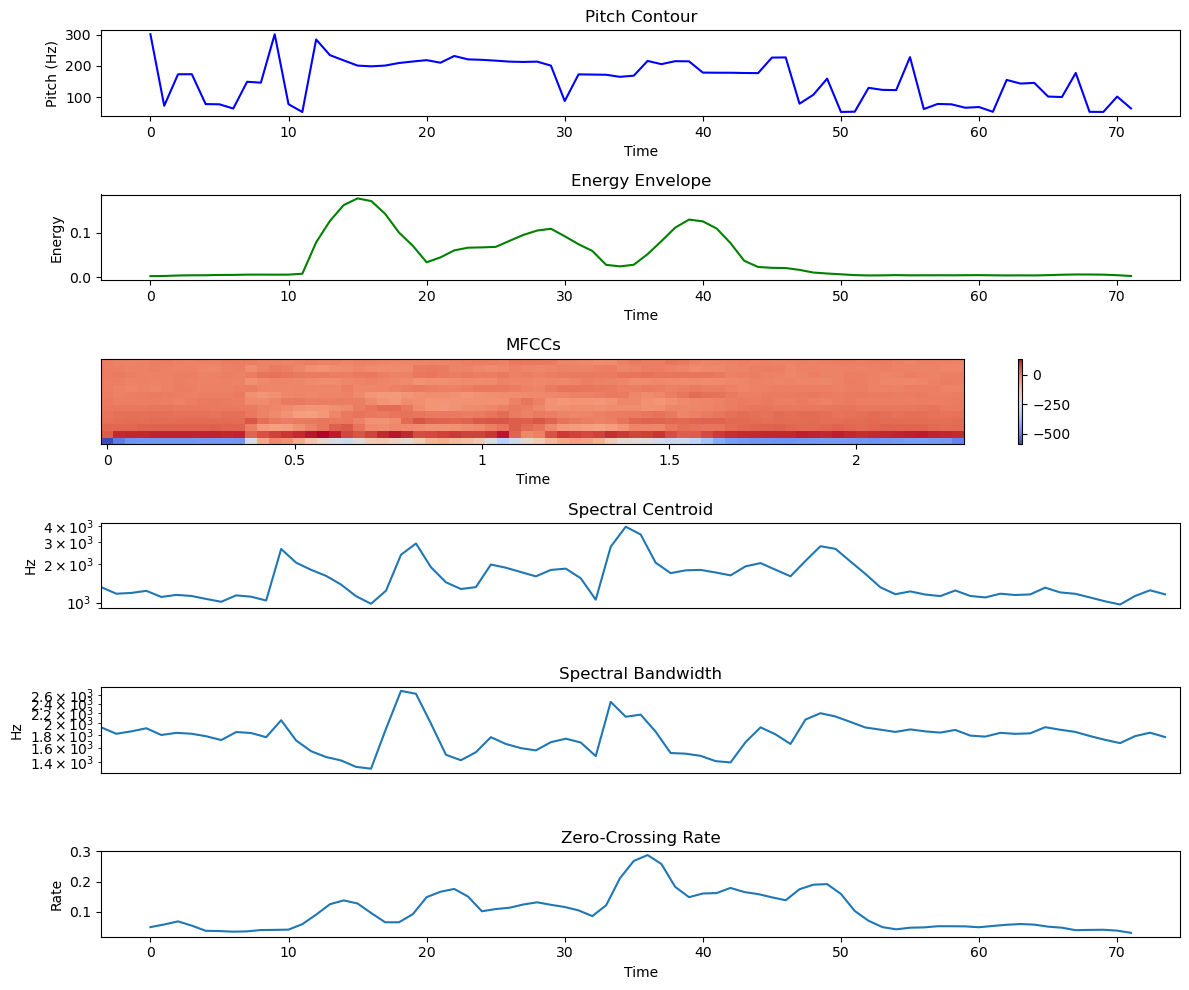

In [29]:
# Set the path to AudioSadTone folder and load a sample file
audio_subset = 'AudioSubSet'
sample_file = '1001_DFA_ANG_XX.wav'
file_path = os.path.join(audio_subset, sample_file)

# Load the audio file
y, sr = librosa.load(file_path, sr=None)

# Calculate audio features
pitch = librosa.yin(y, fmin=50, fmax=300)  # Pitch contour
energy = librosa.feature.rms(y=y)           # RMS energy
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCCs
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)

# Plot the features
plt.figure(figsize=(12, 10))

# Pitch
plt.subplot(6, 1, 1)
plt.plot(pitch, color='b')
plt.title("Pitch Contour")
plt.xlabel("Time")
plt.ylabel("Pitch (Hz)")

# Energy
plt.subplot(6, 1, 2)
plt.plot(energy[0], color='g')
plt.title("Energy Envelope")
plt.xlabel("Time")
plt.ylabel("Energy")

# MFCCs
plt.subplot(6, 1, 3)
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCCs")

# Spectral Centroid
plt.subplot(6, 1, 4)
plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
plt.ylabel("Hz")
plt.xticks([])
plt.xlim([0, spectral_centroid.shape[-1]])
plt.title("Spectral Centroid")

# Spectral Bandwidth
plt.subplot(6, 1, 5)
plt.semilogy(spectral_bandwidth.T, label='Spectral Bandwidth')
plt.ylabel("Hz")
plt.xticks([])
plt.xlim([0, spectral_bandwidth.shape[-1]])
plt.title("Spectral Bandwidth")

# Zero-Crossing Rate
plt.subplot(6, 1, 6)
plt.plot(zcr[0], label='Zero-Crossing Rate')
plt.ylabel("Rate")
plt.xlabel("Time")
plt.title("Zero-Crossing Rate")

plt.tight_layout()
plt.show()


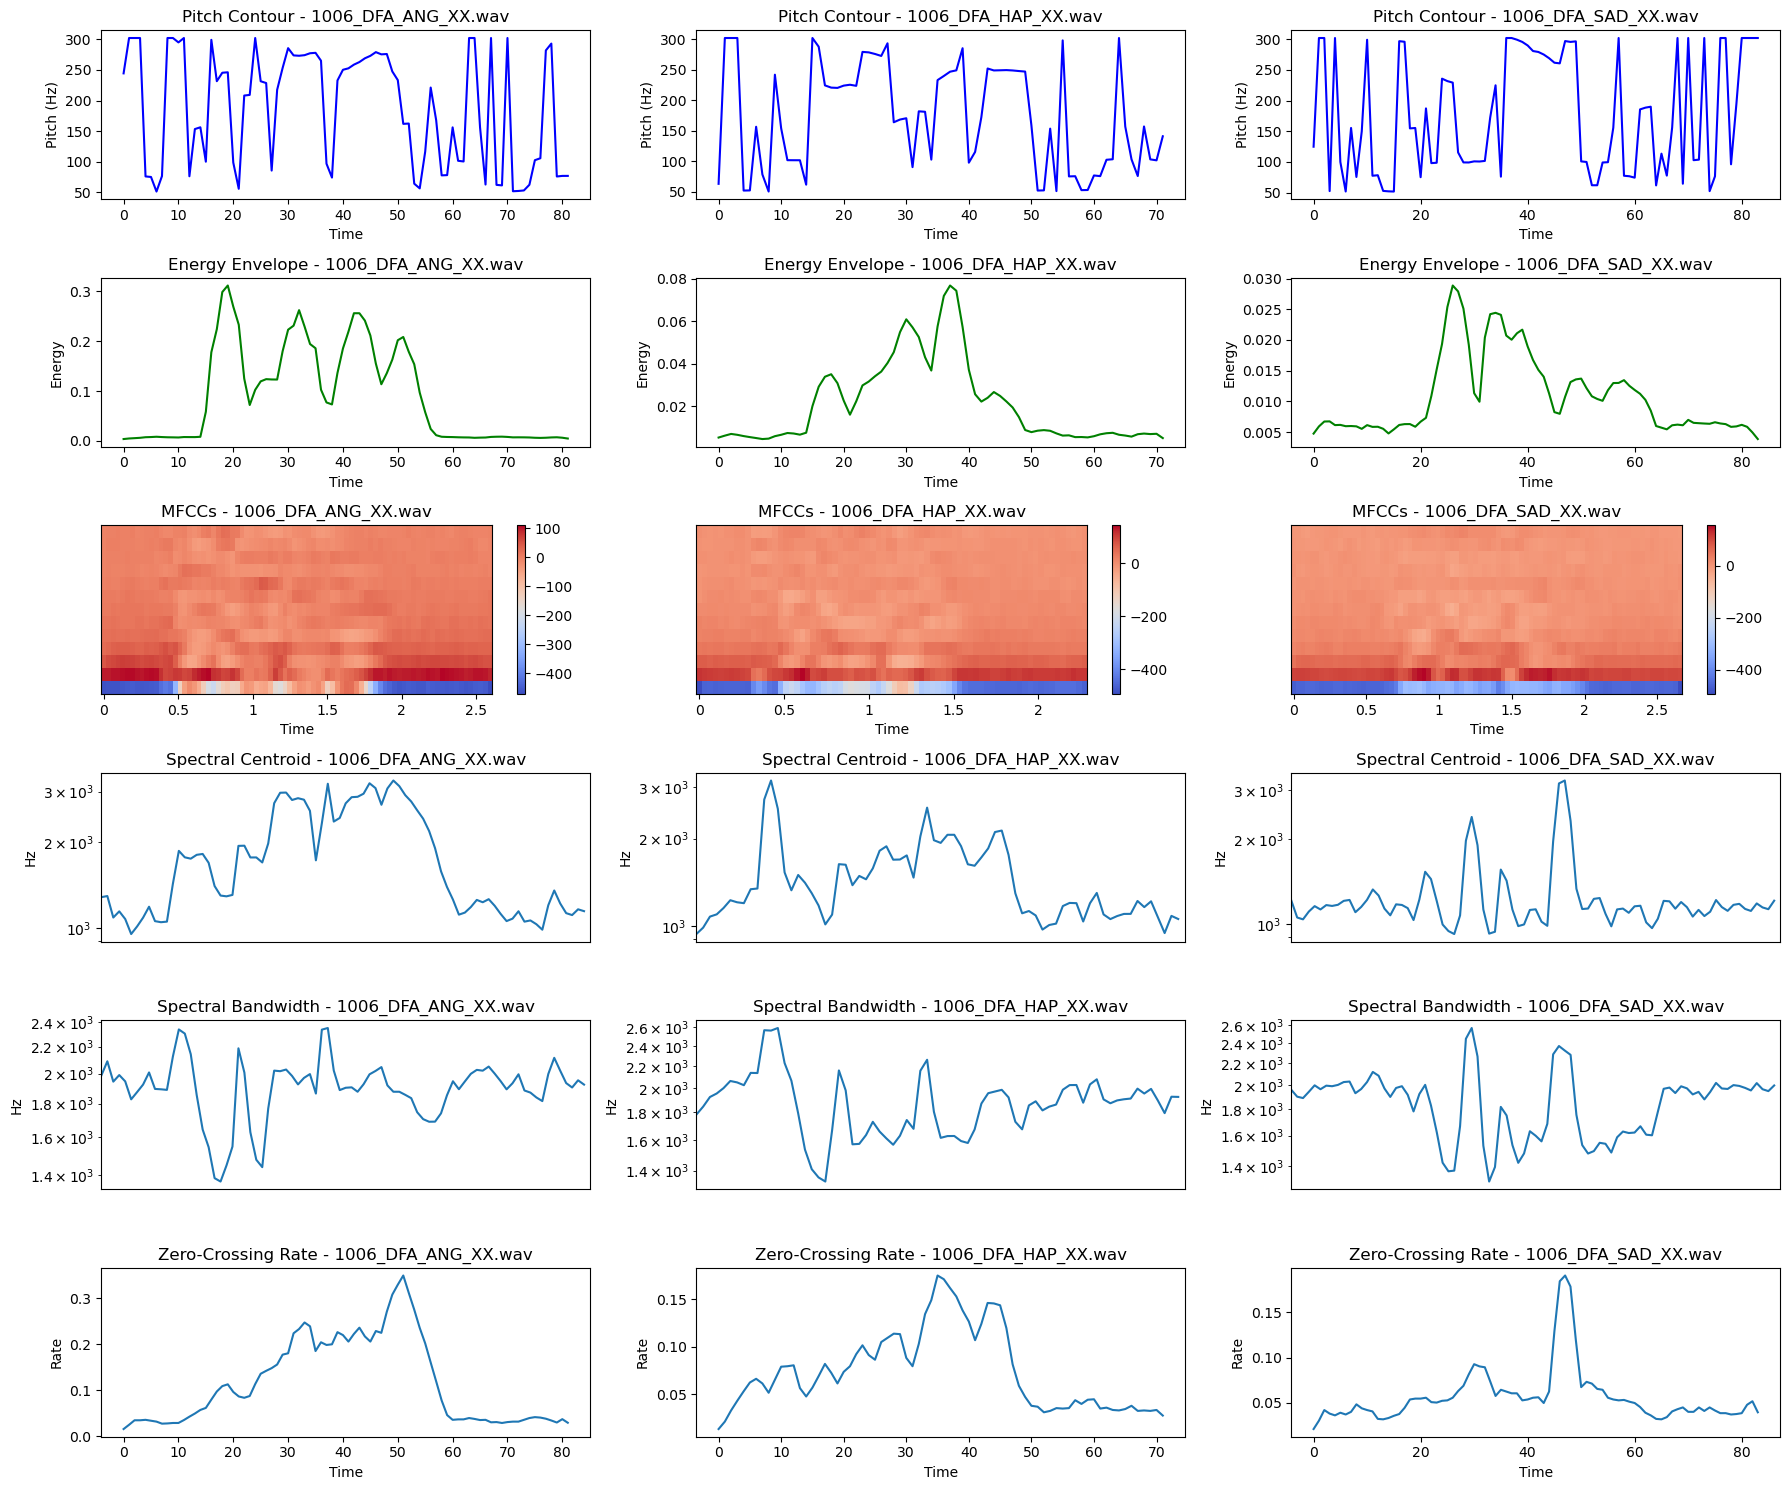

In [15]:
# Set the path to your AudioSubset folder and specify three sample files
audio_subset = 'AudioSubSet'
sample_files = ['1006_DFA_ANG_XX.wav', '1006_DFA_HAP_XX.wav', '1006_DFA_SAD_XX.wav']

# Initialize the plot with columns for each file
plt.figure(figsize=(18, 15))
num_files = len(sample_files)

# Loop through each file and calculate features
for idx, sample_file in enumerate(sample_files):
    file_path = os.path.join(audio_subset, sample_file)
    
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Calculate audio features
    pitch = librosa.yin(y, fmin=50, fmax=300)  # Pitch contour
    energy = librosa.feature.rms(y=y)           # RMS energy
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCCs
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    
    # Plot each feature in a separate row
    # Pitch
    plt.subplot(6, num_files, idx + 1)
    plt.plot(pitch, color='b')
    plt.title(f"Pitch Contour - {sample_file}")
    plt.xlabel("Time")
    plt.ylabel("Pitch (Hz)")
    
    # Energy
    plt.subplot(6, num_files, num_files + idx + 1)
    plt.plot(energy[0], color='g')
    plt.title(f"Energy Envelope - {sample_file}")
    plt.xlabel("Time")
    plt.ylabel("Energy")
    
    # MFCCs
    plt.subplot(6, num_files, 2 * num_files + idx + 1)
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs - {sample_file}")
    
    # Spectral Centroid
    plt.subplot(6, num_files, 3 * num_files + idx + 1)
    plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
    plt.ylabel("Hz")
    plt.xticks([])
    plt.xlim([0, spectral_centroid.shape[-1]])
    plt.title(f"Spectral Centroid - {sample_file}")
    
    # Spectral Bandwidth
    plt.subplot(6, num_files, 4 * num_files + idx + 1)
    plt.semilogy(spectral_bandwidth.T, label='Spectral Bandwidth')
    plt.ylabel("Hz")
    plt.xticks([])
    plt.xlim([0, spectral_bandwidth.shape[-1]])
    plt.title(f"Spectral Bandwidth - {sample_file}")
    
    # Zero-Crossing Rate
    plt.subplot(6, num_files, 5 * num_files + idx + 1)
    plt.plot(zcr[0], label='Zero-Crossing Rate')
    plt.ylabel("Rate")
    plt.xlabel("Time")
    plt.title(f"Zero-Crossing Rate - {sample_file}")

plt.tight_layout()
plt.show()
